In [1]:
 # Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func

In [2]:
df = pd.read_csv("detailed_ev_charging_stations.csv")
df.head()

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [3]:
engine = create_engine("sqlite:///evcharging_station.sqlite")

In [4]:
# Write to SQL (NOTE I AM USING con=engine) THIS IS WHAT WORKS APPARENTLY WHEN WRITING OUT DATA
df.to_sql(name="evcharging_station", con=engine, index=False, if_exists="append", method="multi")

5000

In [5]:
# Create engine using the `ev_charging_stations.sqlite` database file
#engine = create_engine("sqlite:///ev_charging_stations.sqlite")

In [6]:
  # Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

evcharging_station
--------
Station ID TEXT
Latitude FLOAT
Longitude FLOAT
Address TEXT
Charger Type TEXT
Cost (USD/kWh) FLOAT
Availability TEXT
Distance to City (km) FLOAT
Usage Stats (avg users/day) BIGINT
Station Operator TEXT
Charging Capacity (kW) BIGINT
Connector Types TEXT
Installation Year BIGINT
Renewable Energy Source TEXT
Reviews (Rating) FLOAT
Parking Spots BIGINT
Maintenance Frequency TEXT



In [7]:
 conn = engine.connect() # Raw SQL/Pandas

In [8]:
#sql_query = text("""
#    SELECT "Station ID", "Address", "Longitude", "Latitude"  
 #   FROM evcharging_station
  # WHERE "Address" LIKE :address_filter;""")

#address_filter = '%Bangkok%' 

#df = pd.read_sql(sql_query, con=conn, params={"address_filter": address_filter})

In [26]:

# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Configure the map
map_plot_1 = df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600    
)

# Display the map plot
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [10]:
query = text("""
    SELECT
        "Latitude",
        "Longitude",
        "Charger Type",
        COUNT(*) AS NumberOfStations
    FROM
        evcharging_station 
    GROUP BY
        Latitude,
        Longitude,
        "Charger Type"
    ORDER BY
        Latitude,
        Longitude,
        "Charger Type";
""")
df = pd.read_sql(query, con=conn)
df.head(100)

,Latitude,Longitude,Charger Type,NumberOfStations
0,-89.680850,26.774599,AC Level 2,6
1,-89.630746,-32.411680,DC Fast Charger,6
2,-89.578853,-52.465195,AC Level 2,6
3,-89.091257,-149.999355,AC Level 2,6
4,-88.977849,42.804699,AC Level 2,6
...,...,...,...,...
95,-53.684803,-164.605256,AC Level 1,6
96,-53.234064,-127.573339,AC Level 1,6
97,-53.098100,81.621956,DC Fast Charger,6
98,-52.957502,59.119297,AC Level 2,6


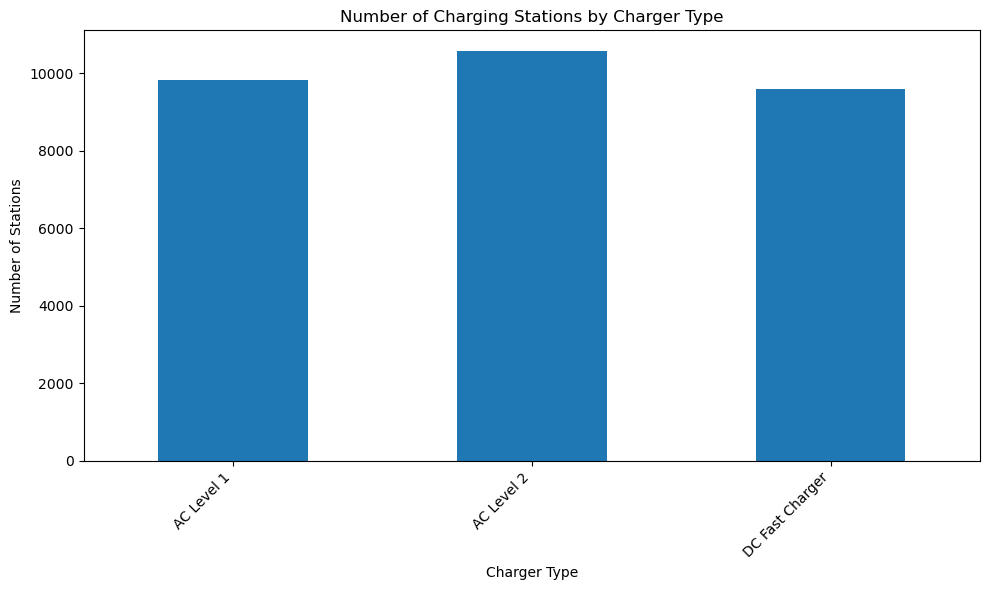

In [11]:
# 6. Create Bar Chart (using matplotlib)

# Group by Charger Type and sum the number of stations
charger_type_counts = df.groupby("Charger Type")["NumberOfStations"].sum()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
charger_type_counts.plot(kind="bar")  # Create a bar chart
plt.title("Number of Charging Stations by Charger Type")
plt.xlabel("Charger Type")
plt.ylabel("Number of Stations")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [13]:
#RAW SQL
query = text("""SELECT "Installation Year", COUNT(*) AS station_count
    FROM evcharging_station
    GROUP BY "Installation Year"
    ORDER BY "Installation Year";
""")

df1 = pd.read_sql(query, con=conn)
df1.head(10)

,Installation Year,station_count
0,2010,2022
1,2011,2022
2,2012,2100
3,2013,2238
4,2014,2010
5,2015,2310
6,2016,2076
7,2017,2244
8,2018,2124
9,2019,2070


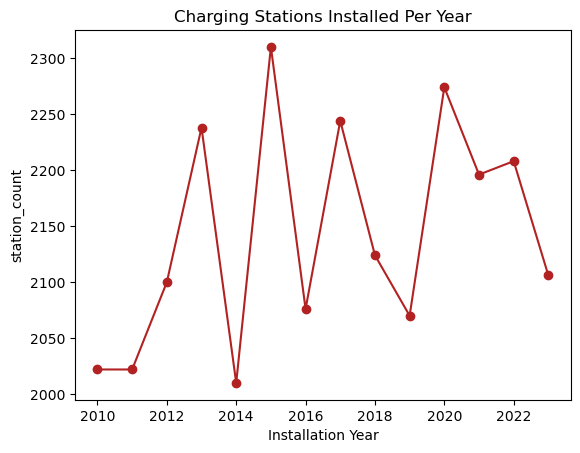

In [14]:
#Visualization: Line chart showing the number of charging stations installed per year.
plt.plot(df1["Installation Year"], df1["station_count"], marker="o", color="firebrick", linestyle="-")
plt.title("Charging Stations Installed Per Year")
plt.xlabel("Installation Year")
plt.ylabel("station_count")
plt.show()


In [15]:
#Visualization: Scatter plot to explore if lower charging costs lead to higher usage.

In [16]:
#RAW SQL
query = text("""SELECT "Latitude", "Longitude"
FROM evcharging_station;
""")

df = pd.read_sql(query, con=conn)
df.head(10)

,Latitude,Longitude
0,-33.400998,77.974972
1,37.861857,-122.490299
2,13.776092,100.412776
3,43.628250,-79.468935
4,19.119865,72.913368
5,-23.695008,-46.548187
6,55.762409,37.655830
7,13.715561,100.561468
8,41.807653,-87.755349
9,39.968701,116.433865


In [17]:
#Visualization: Heatmap displaying the density of charging stations geographically.

In [18]:
#RAW SQL
query = text("""SELECT "Renewable Energy Source", COUNT(*) AS count
FROM evcharging_station
GROUP BY "Renewable Energy Source";
""")

df = pd.read_sql(query, con=conn)
df.head(10)

,Renewable Energy Source,count
0,No,14604
1,Yes,15396


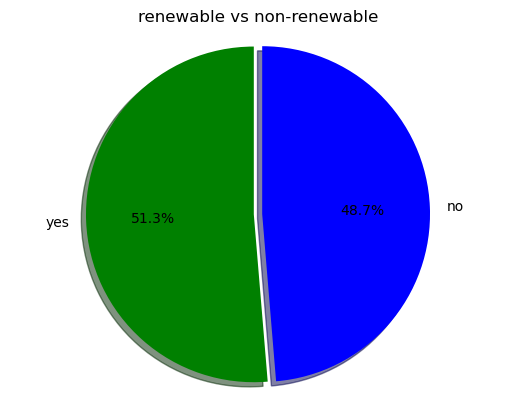

In [19]:
#Visualization: Pie chart showing the percentage of stations powered by renewable energy vs. non-renewable sources.
RenewableSource = ["yes", "no"]
count = [2566, 2434]
colors = ["green", "blue"]
explode = (0, 0.05)

plt.title("renewable vs non-renewable")
plt.pie(count, explode=explode, labels=RenewableSource, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [21]:
address_filter = '%Bangkok%'  # Define the filter *before* using it

query = text("""
    SELECT "Station ID" AS station_id,
           "Address" AS address,
           "Charger Type" AS charger_type  
    FROM evcharging_station
    WHERE "Address" LIKE :address_filter
    ORDER BY "Charger Type";  
""")

df = pd.read_sql(query, con=conn, params={"address_filter": address_filter}) # Pass the parameters here!

print(df.head(100))  # Print the first 10 rows

# If you want to see more rows, you can do this:
# print(df) # This will print all rows of the dataframe
# print(df.to_string()) # This will print all rows and columns of the dataframe

#conn.dispose()  # Close the connection when done

   station_id                    address charger_type
0    EVS00017  3181 Bangkok Ave, Bangkok   AC Level 1
1    EVS00037   880 Bangkok Ave, Bangkok   AC Level 1
2    EVS00095  2173 Bangkok Ave, Bangkok   AC Level 1
3    EVS00147   642 Bangkok Ave, Bangkok   AC Level 1
4    EVS00189  4948 Bangkok Ave, Bangkok   AC Level 1
..        ...                        ...          ...
95   EVS04993  3795 Bangkok Ave, Bangkok   AC Level 1
96   EVS00017  3181 Bangkok Ave, Bangkok   AC Level 1
97   EVS00037   880 Bangkok Ave, Bangkok   AC Level 1
98   EVS00095  2173 Bangkok Ave, Bangkok   AC Level 1
99   EVS00147   642 Bangkok Ave, Bangkok   AC Level 1

[100 rows x 3 columns]


In [22]:
# Load your dataset (assuming it's a CSV file)
df = pd.read_csv("detailed_ev_charging_stations.csv")

# Drop the 'Availability' column
df.drop(columns=['Availability'], inplace=True)

# Save the cleaned dataset
df.to_csv("cleaned_data.csv", index=False)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
file_path = "cleaned_data.csv"
df = pd.read_csv(file_path)
# Count the number of stations installed each year
installation_counts = df["Installation Year"].value_counts().sort_index()
# Convert to DataFrame for better readability
installation_table = pd.DataFrame({
    "Year": installation_counts.index,
    "Number of Stations Installed": installation_counts.values
})


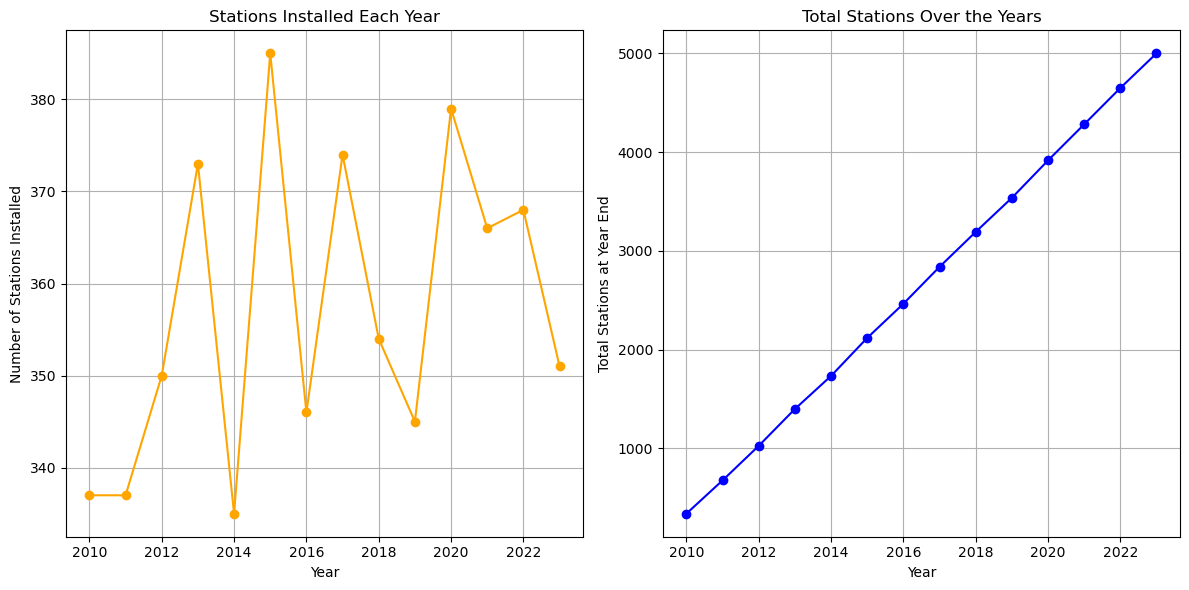

In [24]:
# Calculate the cumulative total of stations installed
installation_table["Total Stations at Year End"] = installation_table["Number of Stations Installed"].cumsum()
# Create a figure with two subplots
plt.figure(figsize=(12, 6))
# Plot 1: Stations Installed Each Year
plt.subplot(1, 2, 1)
plt.plot(installation_table["Year"], installation_table["Number of Stations Installed"], marker='o', linestyle='-', color='orange')
plt.xlabel("Year")
plt.ylabel("Number of Stations Installed")
plt.title("Stations Installed Each Year")
plt.grid(True)
# Plot 2: Total Stations Over the Years
plt.subplot(1, 2, 2)
plt.plot(installation_table["Year"], installation_table["Total Stations at Year End"], marker='o', linestyle='-', color='blue')
plt.xlabel("Year")
plt.ylabel("Total Stations at Year End")
plt.title("Total Stations Over the Years")
plt.grid(True)
# Show the plots
plt.tight_layout()
plt.show()

In [25]:
conn.close()
engine.dispose()